In [1]:
import json
import matplotlib.pyplot as plt
import pandas as pd

def visualize_by_qubit_count(json_path='circuit_specs.json', save_path='circuit_metrics_publication.png', dpi=300, fig_height=7):
    """
    Visualize circuit metrics by qubit count for HUBO and QUBO with publication-quality styling.
    Shows circuit depth and number of gates in a single academic-style plot with line graphs.
    
    Parameters:
    -----------
    json_path : str, optional
        Path to the JSON file containing circuit specifications.
    save_path : str, optional
        Path to save the figure. If None, the figure is displayed but not saved.
    dpi : int, optional
        Resolution of the saved figure in dots per inch.
    fig_height : float, optional
        Height of the figure in inches.
    
    Returns:
    --------
    DataFrame
        Grouped dataframe with the circuit metrics.
    """
    fig_width = 1.618 * fig_height  # Golden ratio for figure width
    
    # Load the JSON data
    with open(json_path, 'r') as f:
        data = json.load(f)
    
    # Create a dataframe to hold all the metrics
    all_data = []
    
    # Process the data
    for problem_type in ['HUBO', 'QUBO']:
        if problem_type in data:
            problem_data = data[problem_type]
            
            for circuit_id, circuit_info in problem_data.items():
                if 'specs' in circuit_info:
                    specs = circuit_info['specs']
                    
                    num_wires = specs['num_wires']
                    depth = specs['depth']
                    num_gates = specs['num_gates']
                    
                    # Add to our dataset
                    all_data.append({
                        'Problem Type': problem_type,
                        'Number of Qubits': num_wires,
                        'Circuit Depth': depth,
                        'Number of Gates': num_gates
                    })
    
    # Convert to dataframe
    df = pd.DataFrame(all_data)
    
    # Group by problem type and qubit count to get averages
    grouped = df.groupby(['Problem Type', 'Number of Qubits']).agg({
        'Circuit Depth': 'mean',
        'Number of Gates': 'mean'
    }).reset_index()
    
    # Set publication-quality parameters
    plt.rcParams.update({
        'font.family': 'sans-serif',
        'font.sans-serif': ['Arial', 'Helvetica', 'DejaVu Sans'],
        'font.size': 16,
        'axes.linewidth': 0.8,
        'axes.labelsize': 16,
        'xtick.labelsize': 14,
        'ytick.labelsize': 14,
        'legend.fontsize': 14,
        'legend.frameon': False,
        'legend.handlelength': 1.5,
        'legend.handletextpad': 0.5
    })
    
    # Create figure and axes
    fig, ax = plt.subplots(figsize=(fig_width, fig_height))
    
    # Set light gray background for plotting area
    ax.set_facecolor('#f0f0f0')  # Light smoke gray
    
    # Define a professional color palette (colorblind-friendly)
    colors = ['#0173B2', '#DE8F05', '#029E73', '#D55E00']  # Changed CC78BC (purple) to D55E00 (brick red)
    
    # Prepare the data for plotting
    hubo_data = grouped[grouped['Problem Type'] == 'HUBO']
    qubo_data = grouped[grouped['Problem Type'] == 'QUBO']
    
    # Plot lines instead of bars
    ax.plot(hubo_data['Number of Qubits'], hubo_data['Circuit Depth'], 
            marker='o', linestyle='-', color=colors[2], linewidth=2.5, 
            markersize=8, label='HUBO Depth')
    
    ax.plot(hubo_data['Number of Qubits'], hubo_data['Number of Gates'], 
            marker='s', linestyle='-', color=colors[3], linewidth=2.5, 
            markersize=8, label='HUBO Gates')
    
    ax.plot(qubo_data['Number of Qubits'], qubo_data['Circuit Depth'], 
            marker='o', linestyle='--', color=colors[0], linewidth=2.5, 
            markersize=8, label='QUBO Depth')
    
    ax.plot(qubo_data['Number of Qubits'], qubo_data['Number of Gates'], 
            marker='s', linestyle='--', color=colors[1], linewidth=2.5, 
            markersize=8, label='QUBO Gates')
    
    # Set logarithmic scale for y-axis
    ax.set_yscale('log')
    ax.set_ylabel('Count (log scale)', fontweight='bold')
    
    # Set x-axis properties
    ax.set_xlabel('Number of qubits', fontweight='bold')
    
    # Set title
    #ax.set_title('Circuit Depth and Gate Count by Qubit Count', fontweight='bold', pad=20)
    
    # Add grid
    ax.grid(True, linestyle='--', alpha=0.7, zorder=0)
    
    # Customize spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # Add legend
    legend = ax.legend(loc='upper left', frameon=False)
    
    # Adjust layout
    plt.tight_layout()
    
    # Save if path is provided
    if save_path:
        plt.savefig(save_path, dpi=dpi, bbox_inches='tight')
    
    plt.show()
    return grouped


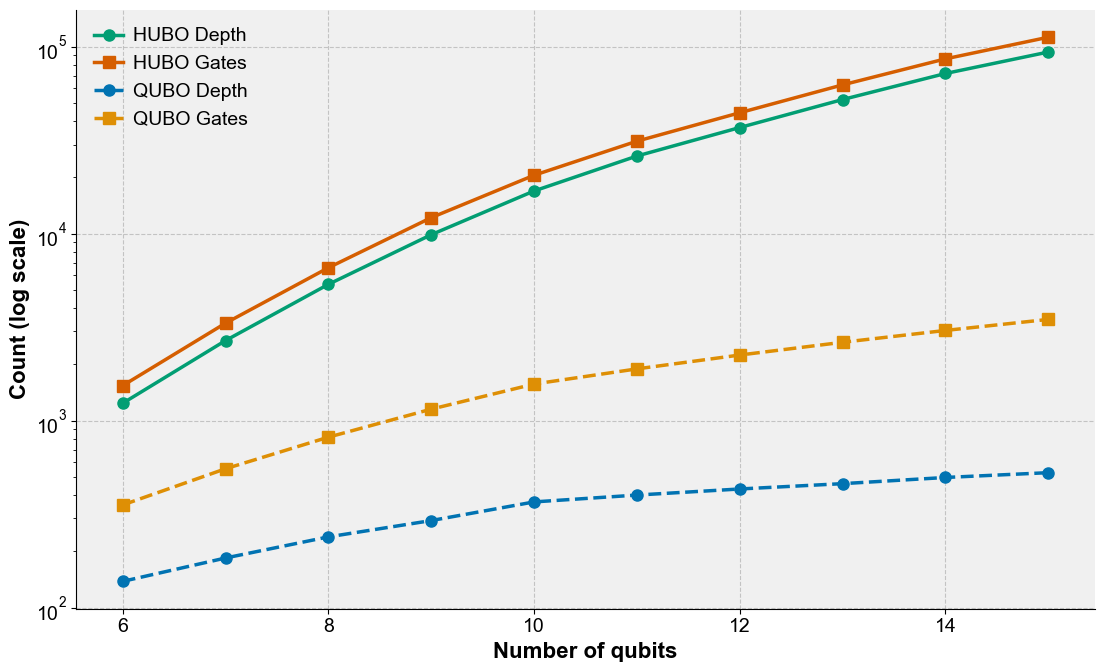

In [2]:
results = visualize_by_qubit_count("circuit_specs.json", "circuit_metrics.png", dpi=300, fig_height=7)